<a href="https://colab.research.google.com/github/adhikaribibek231/MachineLearning/blob/main/bikes_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dataset_cols = [
    'bike_count',
    'hour',
    'temperature',
    'humidity',
    'wind_speed',
    'visibility',
    'dew_point',
    'solar_radiation',
    'rainfall',
    'snowfall',
    'functioning_day'
]

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/SeoulBikeData.csv", encoding='latin1').drop(['Date','Holiday','Seasons'],axis=1)

In [5]:
df.columns = dataset_cols
df = df[df["hour"]==12] # Keep only the rows where the hour is 12 (noon)
df['functioning_day'] = (df["functioning_day"]== 'Yes').astype(int)
df = df.drop(['hour'],axis=1)

In [6]:
df.head()

,bike_count,temperature,humidity,wind_speed,visibility,dew_point,solar_radiation,rainfall,snowfall,functioning_day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


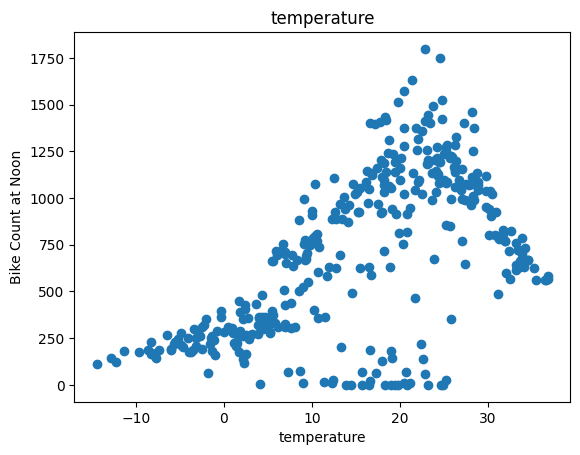

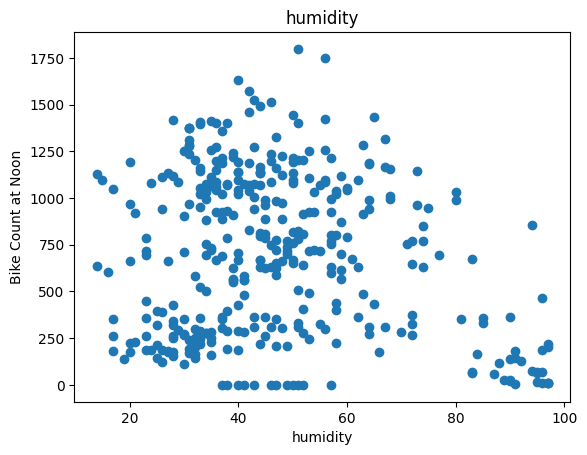

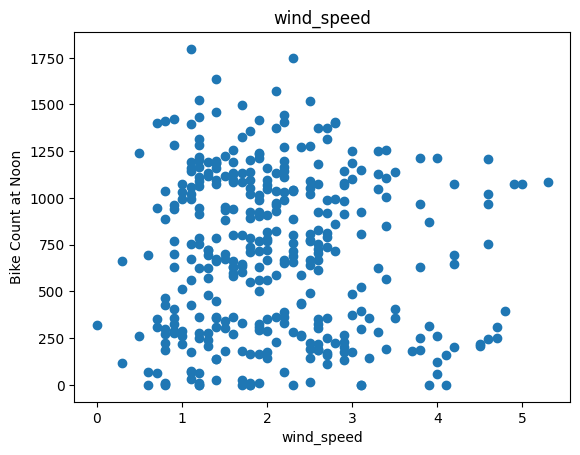

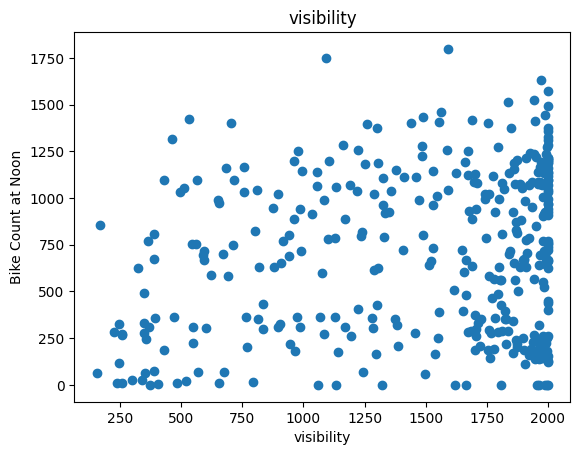

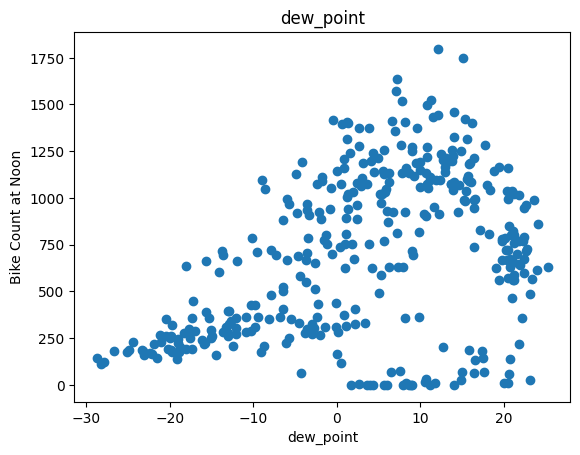

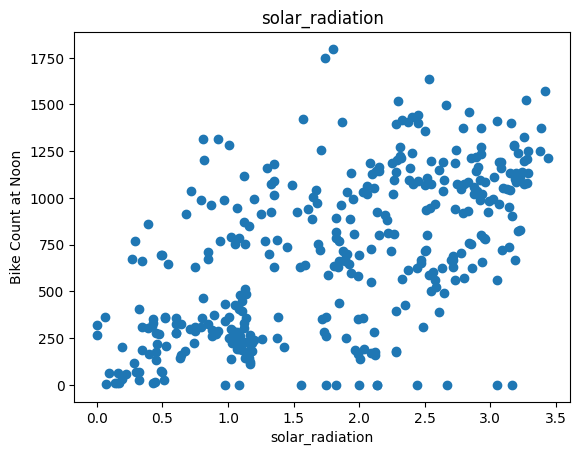

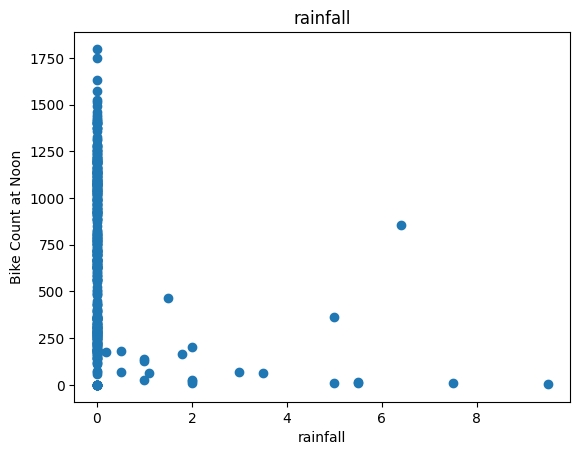

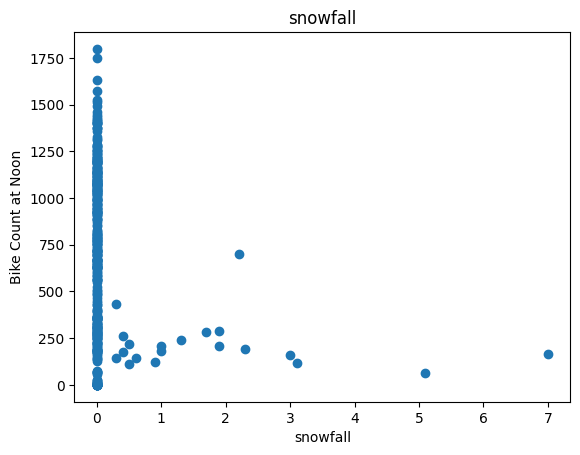

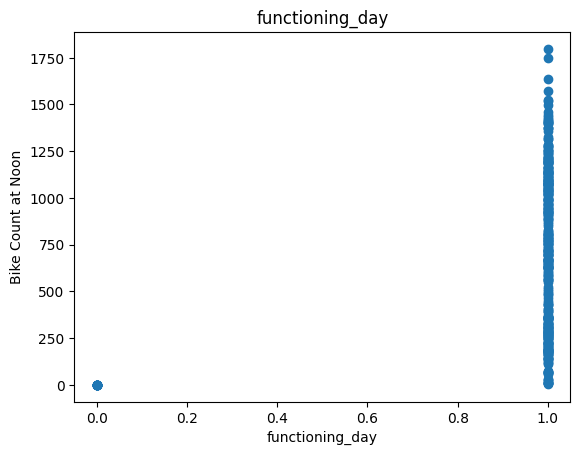

In [7]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()

In [8]:
df = df.drop(['wind_speed','visibility','functioning_day'], axis=1)

In [9]:
df.head()

,bike_count,temperature,humidity,dew_point,solar_radiation,rainfall,snowfall
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [10]:
#train/valid/test

train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
def get_xy(dataframe,y_label,x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X= dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels)==1:
      X=dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X=dataframe[x_labels].values
  y=dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X,y))
  return data,X,y

In [12]:
_,X_train_temp, y_train_temp = get_xy(train, 'bike_count', x_labels=['temperature'])
_,X_valid_temp, y_valid_temp = get_xy(valid, 'bike_count', x_labels=['temperature'])
_,X_test_temp, y_test_temp = get_xy(test, 'bike_count', x_labels=['temperature'])

In [13]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [14]:
print(temp_reg.coef_, temp_reg.intercept_)

[[21.42222933]] [358.07120939]


In [15]:
temp_reg.score(X_test_temp,y_test_temp)

0.29031679806134436

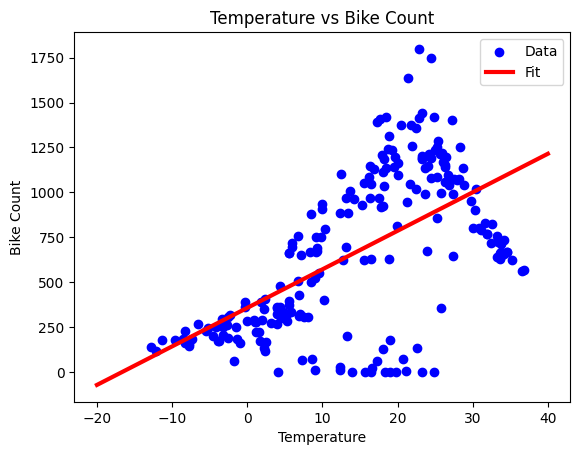

In [16]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color ='blue')
x = tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit",color="red", linewidth=3)
plt.legend()
plt.title("Temperature vs Bike Count")
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.show()

In [17]:
#multiple Linear Regression
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
_,X_train_all, y_train_all = get_xy(train, 'bike_count', x_labels=df.columns[1:])
_,X_valid_all, y_valid_all = get_xy(valid, 'bike_count', x_labels=df.columns[1:])
_,X_test_all, y_test_all = get_xy(test, 'bike_count', x_labels=df.columns[1:])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [18]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [19]:
all_reg.score(X_test_all,y_test_all)

0.4051319722109473

In [60]:
y_pred_lr = all_reg.predict(X_test_all)

In [21]:
#regression with neural Net
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.grid(True)
  plt.legend()
  plt.show()

In [22]:
temp_nn_model=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [23]:
temp_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.1), loss = 'mean_squared_error')

In [24]:
history= temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_valid_temp,y_valid_temp)
)

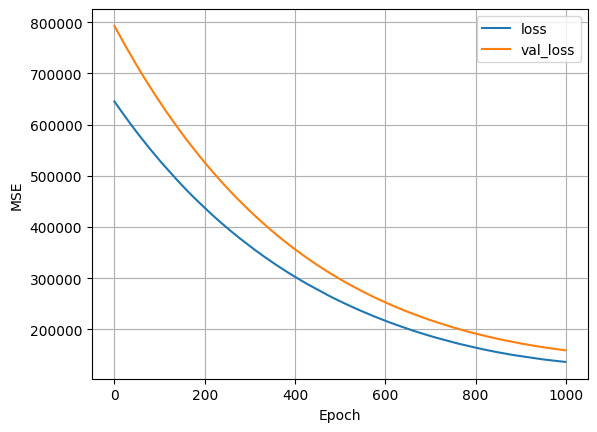

In [28]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


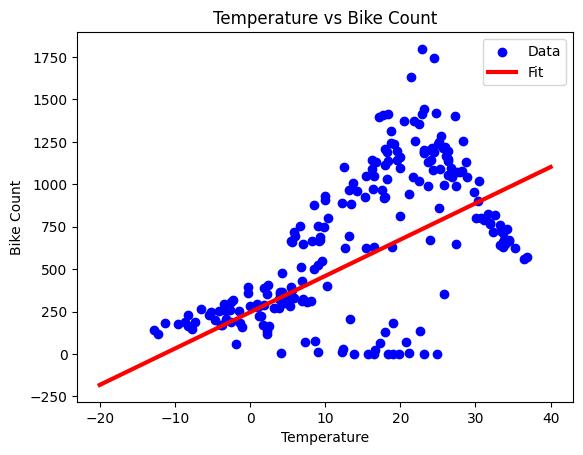

In [29]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color ='blue')
x = tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)), label="Fit",color="red", linewidth=3)
plt.legend()
plt.title("Temperature vs Bike Count")
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.show()

#Neural Net

In [47]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [48]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_valid_temp, y_valid_temp),
    verbose=0, epochs=100
)

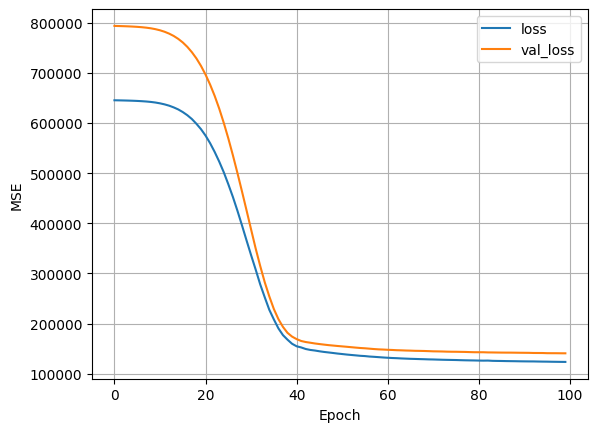

In [49]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


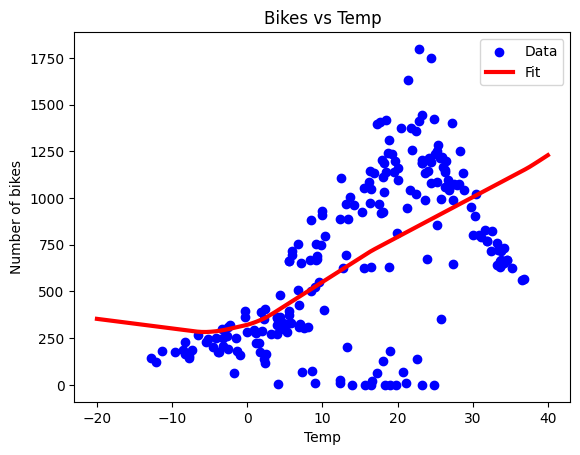

In [51]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [56]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [58]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_valid_all, y_valid_all),
    verbose=0, epochs=100
)

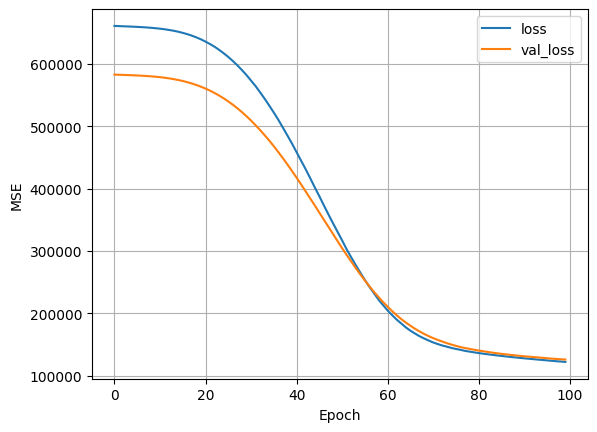

In [59]:
plot_loss(history)

In [62]:
#calculate the MSE for both linear regression and nn
y_pred_lr=all_reg.predict(X_test_all)
y_pred_nn=nn_model.predict(X_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step


In [63]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [64]:
MSE(y_pred_lr,y_test_all)

np.float64(87456.11347598216)

In [65]:
MSE(y_pred_nn,y_test_all)

np.float64(123051.45288243456)

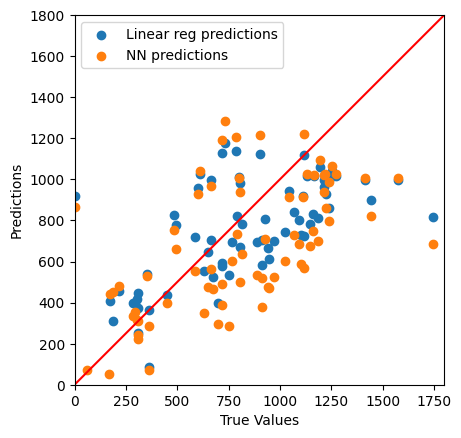

In [70]:
ax= plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Linear reg predictions")
plt.scatter(y_test_all, y_pred_nn, label="NN predictions")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims= [0,1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_=plt.plot(lims,lims,c="red")